In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import linear_model
%matplotlib inline 

In [2]:
df=pd.read_csv(r"D:\DATA SCIENTIST & AI\Code Basic\py-master\ML\9_decision_tree\salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
salary_not_more_then_100k=df[df.salary_more_then_100k==0]
salary_not_more_then_100k

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
4,google,computer programmer,bachelors,0
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0


In [4]:
salary_more_then_100k=df[df.salary_more_then_100k==1]
salary_more_then_100k

,company,job,degree,salary_more_then_100k
2,google,business manager,bachelors,1
3,google,business manager,masters,1
5,google,computer programmer,masters,1
9,abc pharma,business manager,masters,1
10,facebook,sales executive,bachelors,1
11,facebook,sales executive,masters,1
12,facebook,business manager,bachelors,1
13,facebook,business manager,masters,1
14,facebook,computer programmer,bachelors,1
15,facebook,computer programmer,masters,1


In [5]:
salary_not_more_then_100k.shape

(6, 4)

In [6]:
salary_more_then_100k.shape

(10, 4)

In [7]:
df.describe()

,salary_more_then_100k
count,16.000
mean,0.625
std,0.500
min,0.000
25%,0.000
50%,1.000
75%,1.000
max,1.000


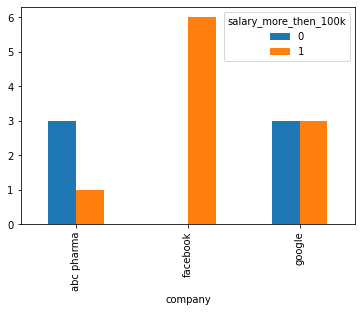

In [8]:
pd.crosstab(df["company"],df["salary_more_then_100k"]).plot(kind='bar')

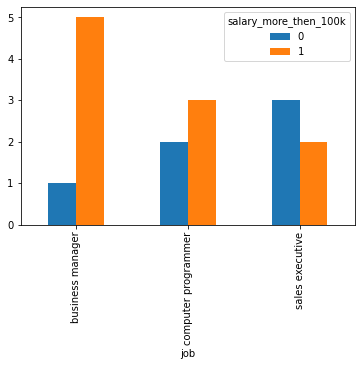

In [9]:
pd.crosstab(df["job"],df["salary_more_then_100k"]).plot(kind='bar')

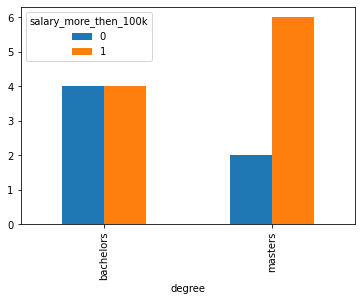

In [10]:
pd.crosstab(df["degree"],df["salary_more_then_100k"]).plot(kind='bar')

In [11]:
inputs = df.drop('salary_more_then_100k',axis='columns')
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [12]:
target=df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [14]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [15]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [16]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
inputs_n 

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [17]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [18]:
model.score(inputs_n,target)

1.0

## Is salary of Google, Business Manager, Master degree > 100 k ?

In [19]:
model.predict([[2,0,1]])

array([1], dtype=int64)

## Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?

In [20]:
model.predict([[2,1,0]])

array([0], dtype=int64)

## Exercise: Build decision tree model to predict survival based on certain parameters
CSV file is available to download at https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv

In this file using following columns build a model to predict if person would survive or not,
Pclass
Sex
Age
Fare

### Calculate score of your model

In [4]:
df_titanic= pd.read_csv(r"D:\DATA SCIENTIST & AI\Code Basic\py-master\ML\9_decision_tree\Exercise\titanic.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


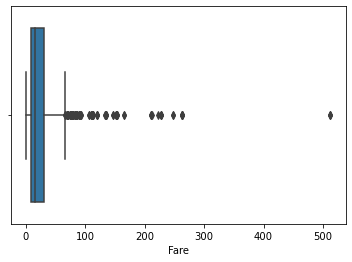

In [5]:
import seaborn as sns
sns.boxplot(df_titanic["Fare"])

In [6]:
filter=df_titanic["Fare"].values>100
df_titanic_outlier_removal_Fare=df_titanic[filter]
df_titanic_outlier_removal_Fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


In [7]:
df_titanic_outlier_removal_Fare.shape

(53, 12)

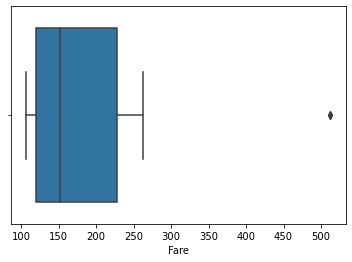

In [8]:
import seaborn as sns
sns.boxplot(df_titanic_outlier_removal_Fare["Fare"])

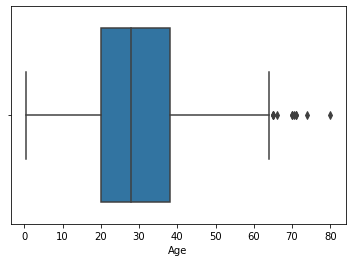

In [9]:
import seaborn as sns
sns.boxplot(df_titanic["Age"])

In [10]:
filter=df_titanic["Age"].values>60
df_titanic_outlier_removal_Age=df_titanic[filter]
df_titanic_outlier_removal_Age

<ipython-input-10-7a2344307fd3>:1: RuntimeWarning: invalid value encountered in greater
  filter=df_titanic["Age"].values>60


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [11]:
df_titanic_outlier_removal_Age.shape

(22, 12)

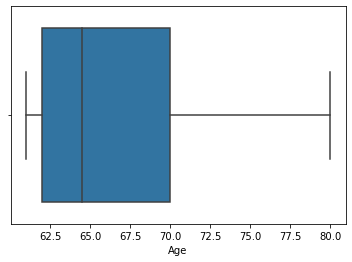

In [12]:
import seaborn as sns
sns.boxplot(df_titanic_outlier_removal_Age["Age"])

In [13]:
Survived=df_titanic[df_titanic.Survived==1]
Survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [14]:
Not_Survived=df_titanic[df_titanic.Survived==0]
Not_Survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


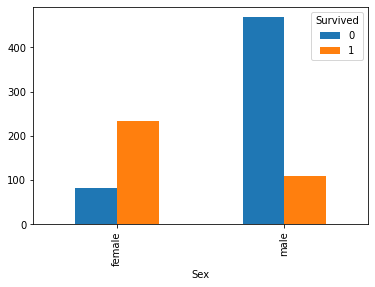

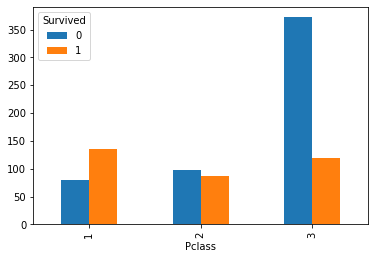

In [15]:
pd.crosstab(df_titanic["Sex"],df_titanic["Survived"]).plot(kind='bar')
pd.crosstab(df_titanic["Pclass"],df_titanic["Survived"]).plot(kind='bar')

In [16]:
# Number of missing values in the data
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### We have set a limit to 70 percent, so that the columns having null values more than or equal to 70 percent are dropped from the dataframe. Viewing columns to see which column in the dataset has been dropped.

In [17]:
# Set the limit
# Drop columns using that limit
limit = len(df_titanic) *0.7
new=df_titanic.dropna(axis=1, thresh=limit)

# View columns in the dataset
new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
df_titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [19]:
inputs = df_titanic.drop("Survived",axis='columns')
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [20]:
target=df_titanic.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [21]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})
inputs.Sex 

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [22]:
inputs.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [23]:
inputs.Age.mean()

29.69911764705882

In [24]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())
inputs.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [25]:
inputs.head(n=889)

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
884,3,1,25.000000,7.0500
885,3,2,39.000000,29.1250
886,2,1,27.000000,13.0000
887,1,2,19.000000,30.0000


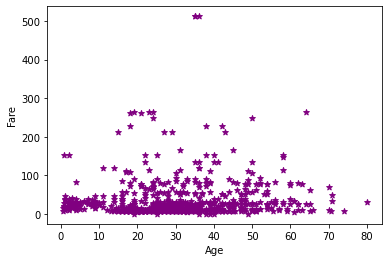

In [45]:
plt.xlabel('Age')
plt.ylabel('Fare')
plt.scatter(df_titanic['Age'],df_titanic['Fare'],color="Purple",marker='*')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,train_size=0.2)

In [1]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [29]:
X_train

,Pclass,Sex,Age,Fare
718,3,1,29.699118,15.5000
541,3,2,9.000000,31.2750
263,1,1,40.000000,0.0000
39,3,2,14.000000,11.2417
262,1,1,52.000000,79.6500
...,...,...,...,...
445,1,1,4.000000,81.8583
686,3,1,14.000000,39.6875
561,3,1,40.000000,7.8958
441,3,1,20.000000,9.5000


In [30]:
X_train.shape

(178, 4)

In [31]:
y_train

718    0
541    0
263    0
39     1
262    0
      ..
445    1
686    0
561    0
441    0
781    1
Name: Survived, Length: 178, dtype: int64

In [32]:
y_train.shape

(178,)

In [33]:
X_test

,Pclass,Sex,Age,Fare
559,3,2,36.000000,17.4000
655,2,1,24.000000,73.5000
733,2,1,23.000000,13.0000
210,3,1,24.000000,7.0500
693,3,1,25.000000,7.2250
...,...,...,...,...
765,1,2,51.000000,77.9583
731,3,1,11.000000,18.7875
7,3,1,2.000000,21.0750
114,3,2,17.000000,14.4583


In [34]:
y_test

559    1
655    0
733    0
210    0
693    0
      ..
765    1
731    0
7      0
114    0
28     1
Name: Survived, Length: 713, dtype: int64

In [35]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
model.score(X_test,y_test)

0.7629733520336606

In [37]:
y_predicted=model.predict(X_test)
y_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,

## Is a person, Survived or not  with given value of Pclass,Sex,Age,Fare?

In [38]:
model.predict([[2,1,27.000000,13.0000]])

array([0], dtype=int64)

In [39]:
model.predict([[1,2,27.000000,13.0000]])

array([1], dtype=int64)

In [40]:
print ("actual:"    ,y_test[0:713])
print ("predicted:" ,model.predict(X_test)[0:713])

actual: 559    1
655    0
733    0
210    0
693    0
      ..
765    1
731    0
7      0
114    0
28     1
Name: Survived, Length: 713, dtype: int64
predicted: [0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 1 

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[372,  78],
       [ 91, 172]], dtype=int64)

Text(69.0, 0.5, 'Truth')

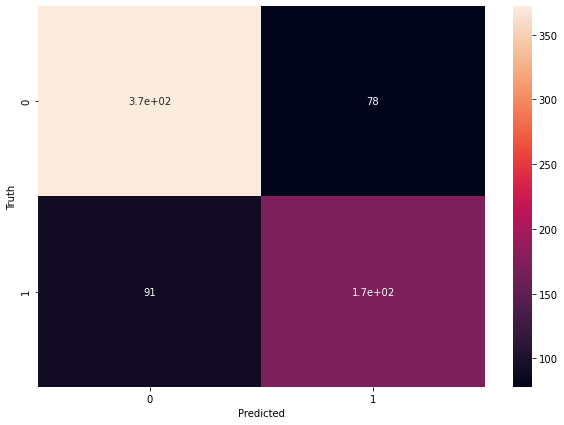

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
correlations=X_test[["Pclass","Sex","Age","Fare"]].corr()
correlations

,Pclass,Sex,Age,Fare
Pclass,1.000000,-0.096055,-0.313228,-0.532121
Sex,-0.096055,1.000000,-0.092216,0.147660
Age,-0.313228,-0.092216,1.000000,0.064786
Fare,-0.532121,0.147660,0.064786,1.000000


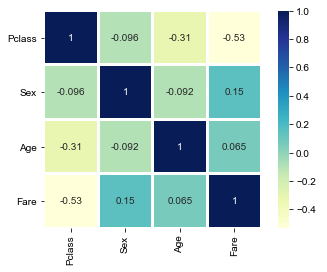

In [44]:
sns.heatmap(correlations,square=True,annot=True,linewidths=2.0,cmap="YlGnBu")
plt.yticks(rotation = 0)
plt.xticks(rotation =90)
sns.set(rc={"figure.figsize":(20,10)}) # frame size

## Model Prediction from Logistics

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,train_size=0.2)

In [47]:
model.fit(X_train,y_train)

LogisticRegression()

In [48]:
model.score(X_train,y_train)

0.7921348314606742

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[297, 140],
       [166, 110]], dtype=int64)

In [50]:
X_train

,Pclass,Sex,Age,Fare
741,1,1,36.000000,78.8500
612,3,2,29.699118,15.5000
256,1,2,29.699118,79.2000
601,3,1,29.699118,7.8958
734,2,1,23.000000,13.0000
...,...,...,...,...
251,3,2,29.000000,10.4625
605,3,1,36.000000,15.5500
818,3,1,43.000000,6.4500
200,3,1,28.000000,9.5000


Text(66.5, 0.5, 'Truth')

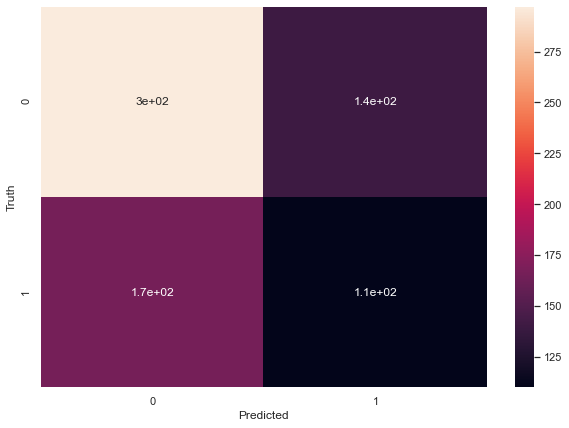

In [51]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## THE END